Q1. What is the mathematical formula for a linear SVM?

Answer 1: f(x) = wx + b
where:

f(x) is the output function that predicts the class of the input vector x.
w is the weight vector that represents the coefficients of the hyperplane that separates the data.
b is the bias term or intercept.

Q2. What is the objective function of a linear SVM?

Answer 2: The objective function of a linear Support Vector Machine (SVM) is to maximize the margin between the two classes while correctly classifying all training samples. The margin is the distance between the decision boundary and the closest point of each class.

Q3. What is the kernel trick in SVM?

Answer 3: The kernel trick is a technique used in Support Vector Machines (SVMs) that allows for the non-linear transformation of input data into a higher-dimensional feature space.

Q4. What is the role of support vectors in SVM Explain with example.

Answer 4: Support vectors play a crucial role in Support Vector Machines (SVMs) as they define the decision boundary of the classifier.

Support vectors are the training samples that lie closest to the decision boundary, also known as the hyperplane. These points are critical for defining the decision boundary as they help to determine the orientation and position of the hyperplane in the feature space.

For example, consider a dataset with two classes that are not linearly separable in 2D space.

The goal of the SVM algorithm is to find the hyperplane that separates the two classes with the maximum margin. The decision boundary is defined by a linear equation:

wT x + b = 0

where w is the weight vector, x is the input vector, and b is the bias term.

To find the optimal hyperplane, the SVM algorithm identifies the support vectors, which are the points closest to the decision boundary. 

Once the support vectors are identified, the SVM algorithm computes the optimal hyperplane that maximizes the margin between the two classes.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

Answer 5: Hyperplane: In SVM, the hyperplane is a decision boundary that separates the data into different classes. It is a linear equation of the form wT x + b = 0, where w is the weight vector, x is the input vector, and b is the bias term. The hyperplane can be visualized as a line in 2D space, a plane in 3D space, and a hyperplane in higher-dimensional spaces.

Marginal plane: The marginal plane is the plane parallel to the hyperplane and passing through the closest points of each class, which are called support vectors. The distance between the hyperplane and the marginal plane is called the margin, and the goal of SVM is to maximize this margin while correctly classifying all training samples.
Example: Continuing from the previous example, the marginal plane is shown by the two black lines that pass through the support vectors.

Soft margin: In some cases, the data may not be perfectly separable by a hyperplane, and SVM can still be used by allowing some misclassifications. This is known as a soft margin, and it introduces a slack variable that penalizes misclassifications. The soft margin allows the hyperplane to have some margin violations, but it tries to minimize the number of violations and the magnitude of the slack variables.

Hard margin: In contrast to a soft margin, a hard margin is used when the data is perfectly separable by a hyperplane. In this case, there are no misclassifications allowed, and the margin is maximized without any violations.

In [ ]:
Q6. SVM Implementation through Iris dataset.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.
Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

Accuracy: 1.03


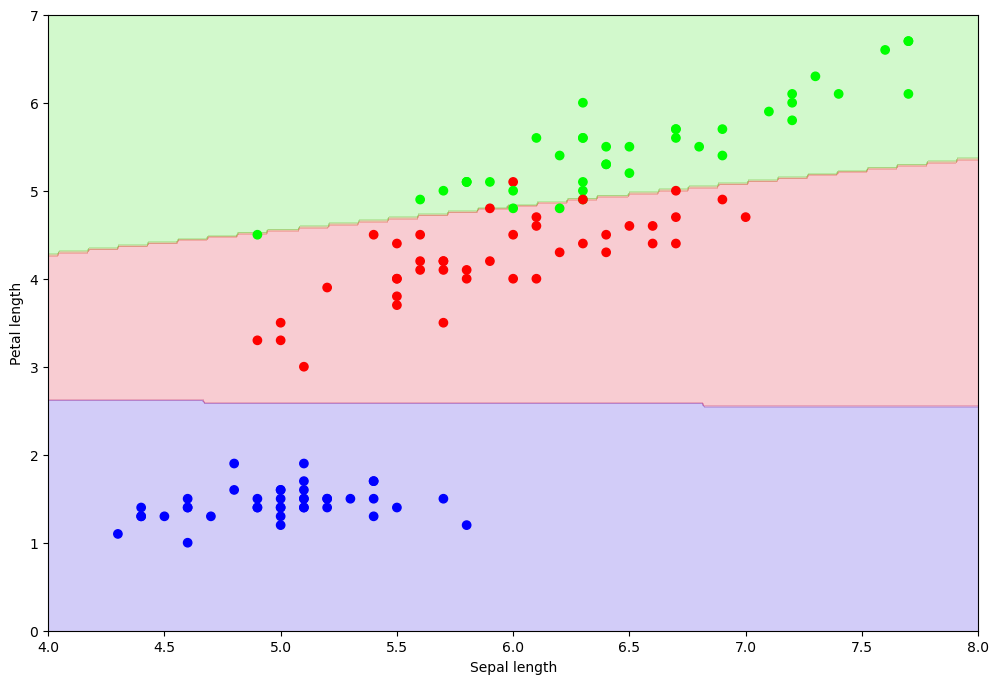

In [1]:
#Answer 6: 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier on the training set
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X_train[:, [0, 2]], y_train)

# Predict the labels for the testing set
y_pred = svm_clf.predict(X_test[:, [0, 2]])

# Compute the accuracy of the model on the testing set
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundaries of the trained model using two of the features
x0, x1 = np.meshgrid(
        np.linspace(4, 8, 500).reshape(-1, 1),
        np.linspace(0, 7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = svm_clf.predict(X_new).reshape(x0.shape)
plt.figure(figsize=(12, 8))
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 2], c=y_train, cmap=plt.cm.brg)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.show()


In [6]:
# Test different values of C
for C in [0.1, 1, 10, 100]:
    # Train an SVM model with the given C value
    svm_clf = SVC(C=C, kernel='linear')
    svm_clf.fit(X_train, y_train)
    
    # Make predictions on the test set and calculate accuracy
    y_pred = svm_clf.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    
    # Print the accuracy and C value
    print(f"C = {C:.1f}, Accuracy = {accuracy:.3f}")

C = 0.1, Accuracy = 1.000
C = 1.0, Accuracy = 1.000
C = 10.0, Accuracy = 0.967
C = 100.0, Accuracy = 1.000


Explanation: In the line accuracy = np.mean(y_pred == y_test), we are comparing the predicted labels (y_pred) to the true labels (y_test) and computing the mean of the resulting boolean array. This gives us the proportion of correctly classified samples in the test set.

The expression y_pred == y_test returns a boolean array of the same length as y_test, where each element is True if the corresponding element in y_pred is equal to the corresponding element in y_test, and False otherwise.

Comparing the predicted labels with the actual labels and computing the mean is a common way to evaluate the accuracy of a classifier. However, there are other evaluation metrics that can be used depending on the problem at hand.

X_new is a two-dimensional array that contains all possible combinations of x0 and x1 coordinates, where x0 is a set of evenly spaced values between 4 and 8, and x1 is a set of evenly spaced values between 0 and 7.

np.c_ is a function from the NumPy library that translates slice objects to concatenation along the second axis. 

x0.ravel() and x1.ravel() are used to convert the two-dimensional arrays x0 and x1 to one-dimensional arrays, which are then concatenated using np.c_. The ravel method is used to flatten the array along its rows.

Next, the trained SVM classifier svm_clf is used to predict the labels of each point in the grid

The predicted labels are stored in a one-dimensional array y_pred, which is then reshaped to match the shape of x0 using the reshape method. 

the resulting array y_pred contains the predicted labels for each point in the grid, and is used to plot the decision boundaries of the trained model.